In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_csv("test_energy_data.csv")

In [4]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [5]:
df.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39
99,Residential,42414,72,24,29.62,Weekday,4722.59


In [7]:
df.shape

(100, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [9]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [10]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [11]:
df[df.duplicated()]

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption


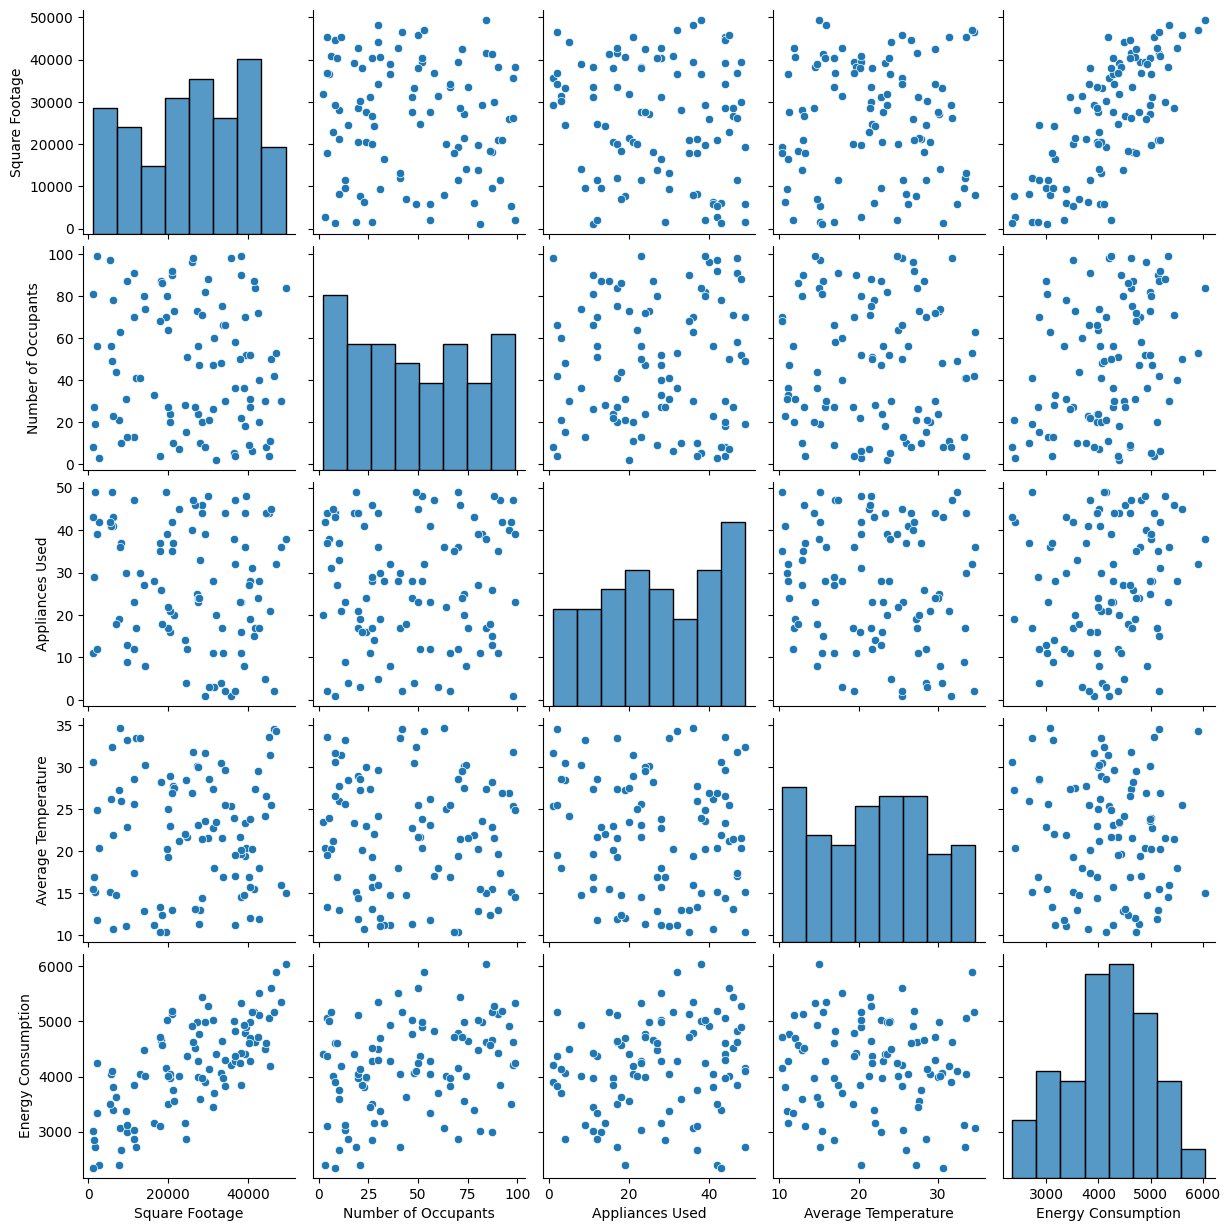

In [12]:
sns.pairplot(df)
plt.show()

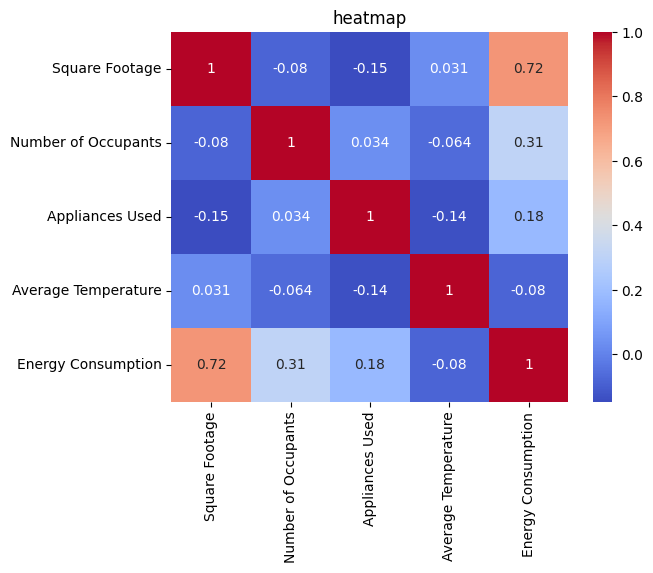

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("heatmap")
plt.show()

In [14]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

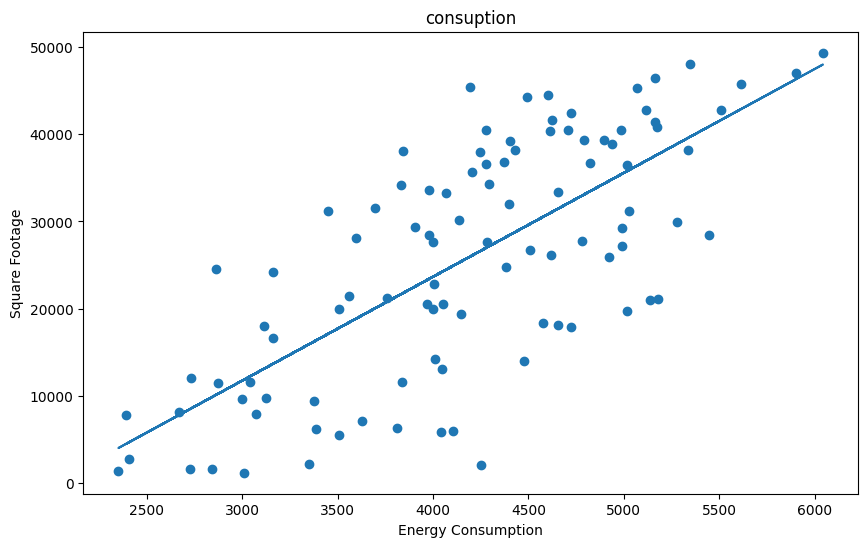

In [16]:
from scipy import stats
plt.figure(figsize=(10,6))
x=df['Energy Consumption']
y=df['Square Footage']
slope,intercept,r,p,std_err=stats.linregress(x,y)
def myfunc(x):
    return slope*x + intercept
plt.scatter(x,y)
plt.plot(x,myfunc(x))
plt.title('consuption')
plt.xlabel('Energy Consumption')
plt.ylabel('Square Footage')
plt.show()

In [20]:
x=df[['Energy Consumption']]
y=df['Square Footage']

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
model=LinearRegression()
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print("r2 : ",r2_score(ytest,y_pred))
print("mse : ",mean_squared_error(ytest,y_pred))
print("rmse : ",np.sqrt(mean_squared_error(ytest,y_pred)))

r2 :  0.5720174246790586
mse :  76819156.59386729
rmse :  8764.653820537767


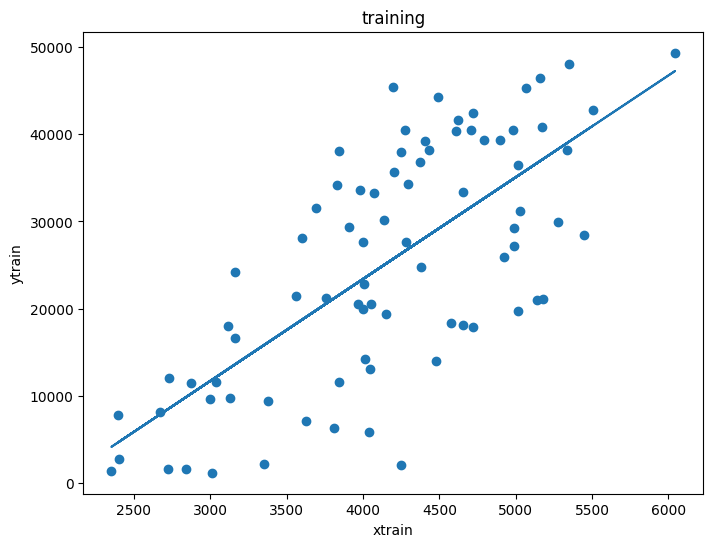

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,model.predict(xtrain))
plt.title("training")
plt.xlabel("xtrain")
plt.ylabel("ytrain")
plt.show()

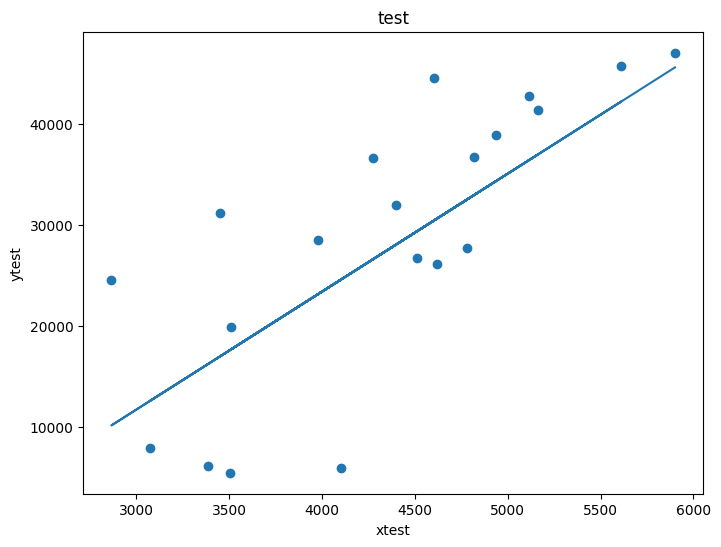

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(xtest,ytest)
plt.plot(xtest,model.predict(xtest))
plt.title("test")
plt.xlabel("xtest")
plt.ylabel("ytest")
plt.show()

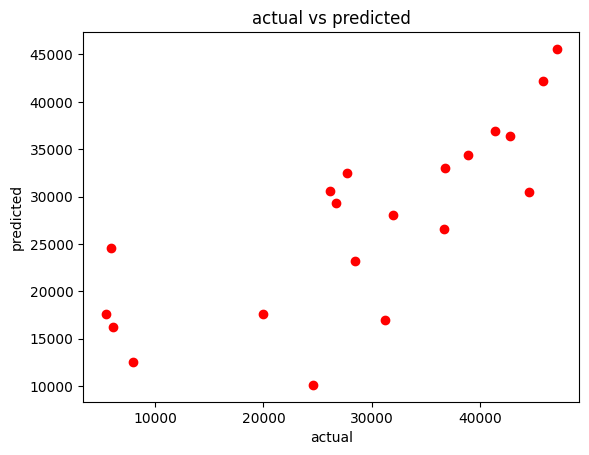

In [27]:
plt.scatter(ytest,y_pred,color='red')
plt.title("actual vs predicted")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [38]:
pip install statsmodels



   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 399.0 kB/s eta 0:00:24
   -- ------------------------------------- 0.5/9.8 MB 399.0 kB/s eta 0:00:24
   -- ------------------------------------- 0.5/9.8 MB 399.0 kB/s eta 0:00:24
   -- ------------------------------------- 0.5/9.8 MB 399.0 kB/s eta 0:00:24
   --- ------------------------------------ 0.8/9.8 MB 332.0 kB/s eta 0:00:28
   --- ------------------------------------ 0.8/9.8 MB 332.0 kB/s eta 0:00:28
   --- ------------------------------------ 0.8/9.8 MB 332.0 kB/s eta 0:00:28
   ---- ----------------------------------- 1.0/9.8 MB 370.1 kB/s eta 0:00:24
   ---- ----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


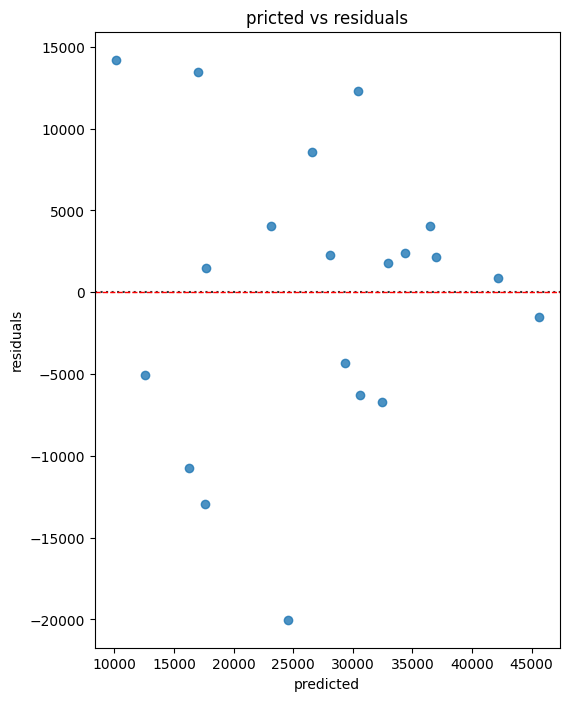

In [43]:
#from scipy.stats import statsmodels
plt.figure(figsize=(6,8))
sns.residplot(x=y_pred,y=ytest-y_pred,line_kws={'color':'red','lw':1})
plt.xlabel("predicted")
plt.ylabel("residuals")
plt.title("pricted vs residuals")
plt.axhline(0,color='red',linestyle='--',linewidth=1)
plt.show()
